In [73]:

def calc_polar(Re, Im):
    import math
    A = []
    fi = []
    for i in range(len(Re)):
        A.append( (Im[i]**2 + Re[i]**2 )**(1/2) )
        fi.append(-math.atan2(Im[i], Re[i]))
    return fi, A

def calc_coords(fi, A):
    import math
    Re = []
    Im = []
    for i in range(len(A)):
        Re.append(A[i]*math.cos(fi[i]))
        Im.append(A[i]*math.sin(fi[i]))
    return Re, Im

def approxim(fi, A, k):
    from numpy.polynomial import Polynomial
    import numpy as np

    approximation = Polynomial.fit(fi , A, k)

    fi=np.linspace(min(fi), max(fi), 500)

    A= approximation(fi)
    return fi, A




    
        

In [74]:
Re_st = [12, 11.9, 11.3, 11,10,8,6,4,2,1.5,1,0.5]
Im_st = [-0.1,-2,-3,-4,-5,-5.9,-6,-5.6,-4,-3.2,-2.8,-2]


Re_rez = [0.02,0.04,0.055,0.06,0.05,0.02,0,-0.02,-0.04,-0.045,-0.04,-0.03]
Im_rez = [-0.001,-0.02,-0.04,-0.06,-0.1,-0.12,-0.125,-0.12,-0.1,-0.07,-0.04,-0.015]



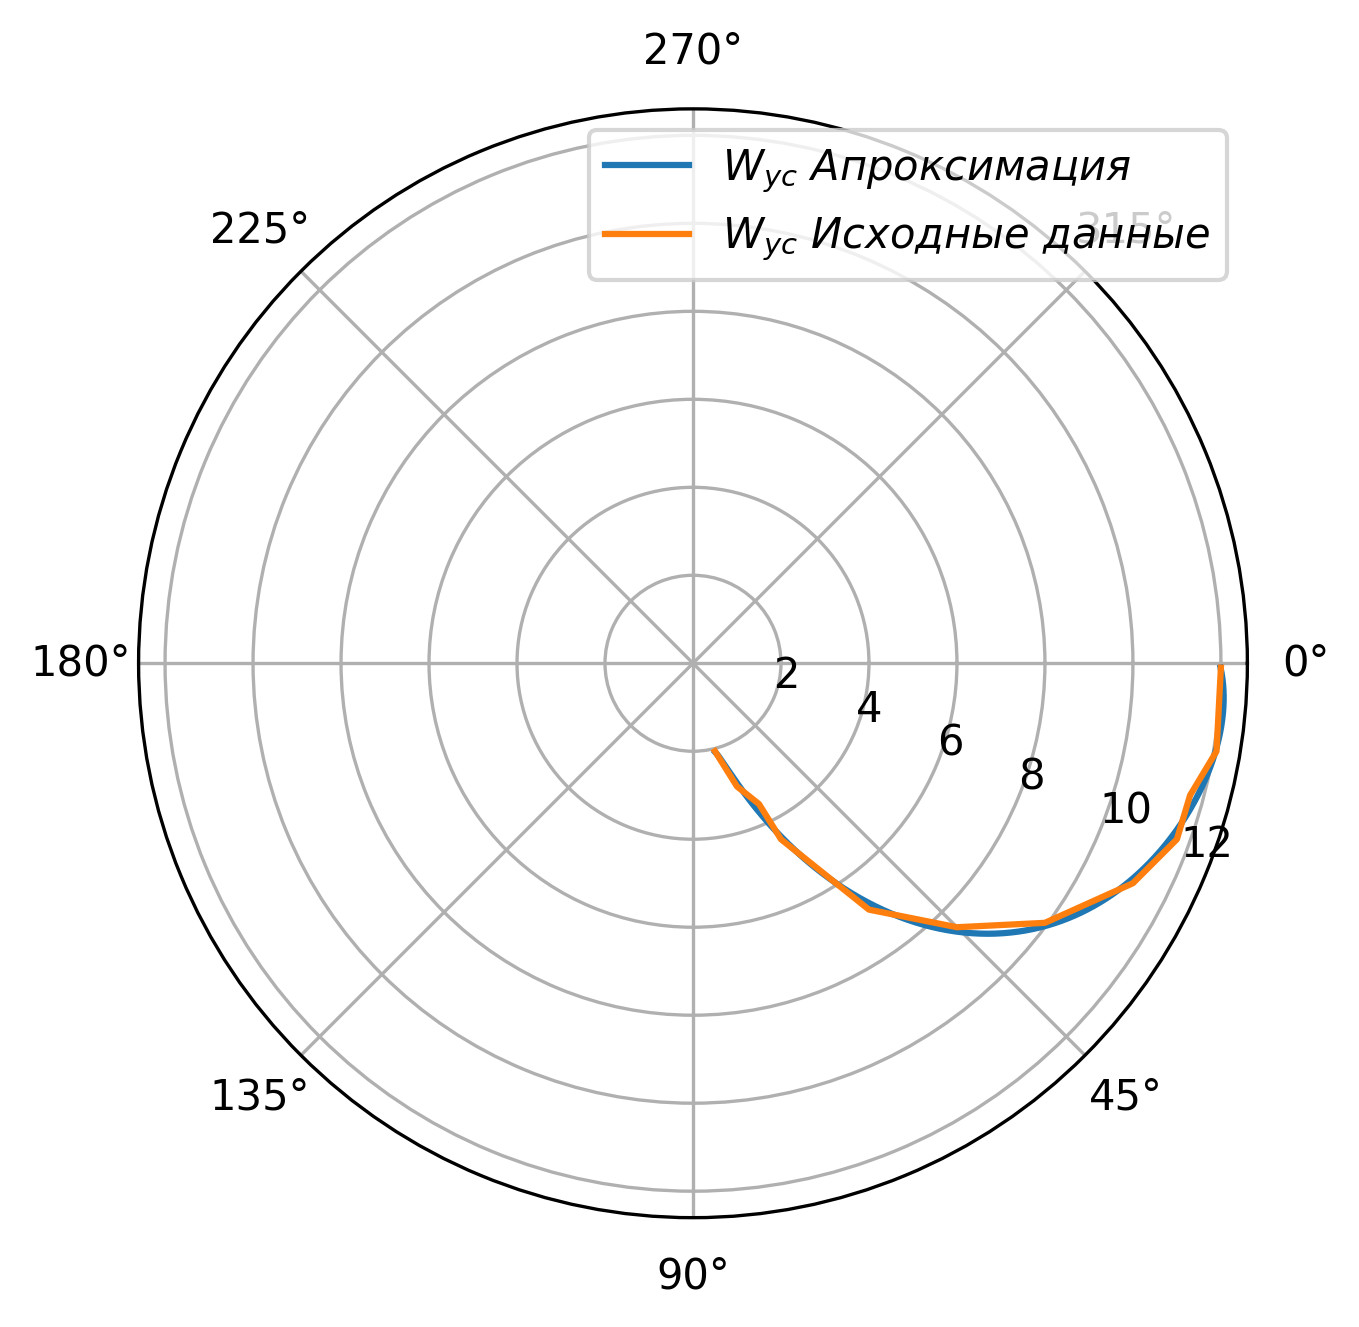

In [75]:
import matplotlib.pyplot as plt
import math


fi_st_0, A_st_0 = calc_polar(Re_st, Im_st)
fi_st, A_st = approxim(fi_st_0, A_st_0, 5)

ax= plt.subplot(111, projection='polar')
ax.set_theta_direction(-1)
ax.plot(fi_st, A_st, label='$W_{ус}$ $Апроксимация$')
ax.plot(fi_st_0, A_st_0, label='$W_{ус}$ $Исходные$ $ данные$')
ax.legend()
plt.rcParams['figure.dpi'] = 300
plt.show()


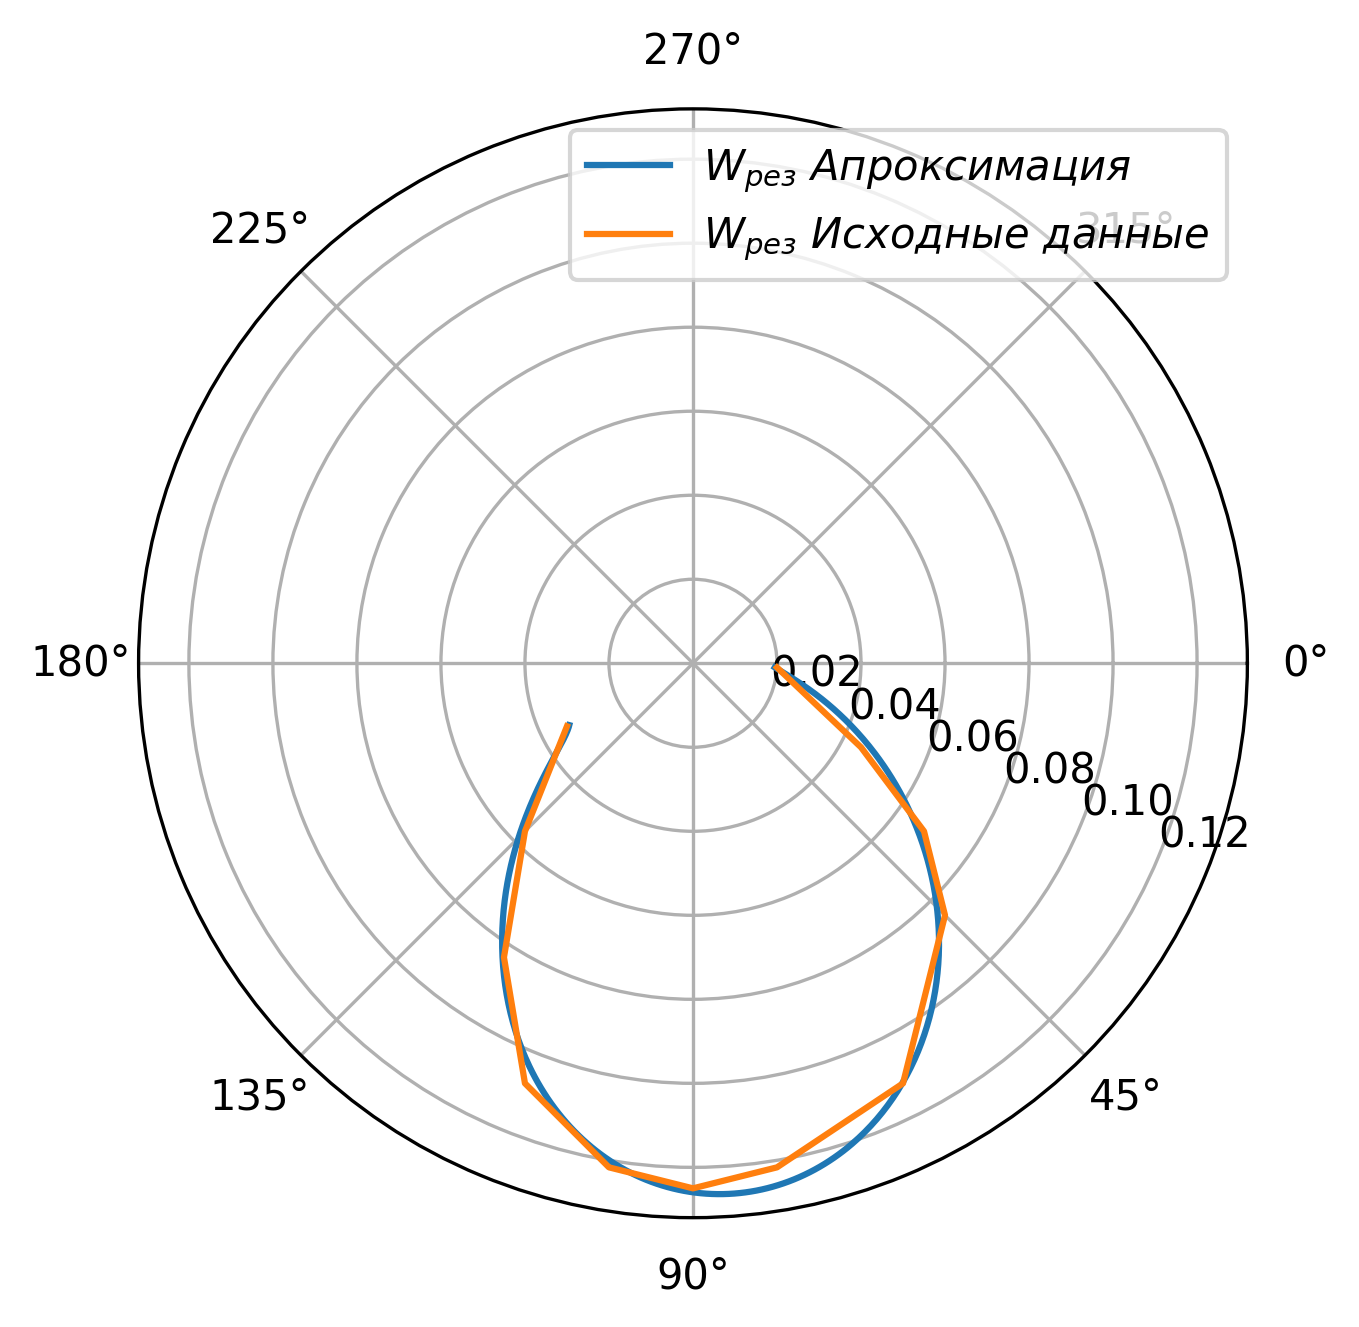

In [76]:
fi_rez_0, A_rez_0 = calc_polar(Re_rez, Im_rez)
fi_rez, A_rez = approxim(fi_rez_0, A_rez_0, 5)

ax= plt.subplot(111, projection='polar')
ax.set_theta_direction(-1)
ax.plot(fi_rez, A_rez, label='$W_{рез}$ $ Апроксимация$')
ax.plot(fi_rez_0, A_rez_0, label='$W_{рез}$ $ Исходные$ $ данные$')
ax.legend()
plt.rcParams['figure.dpi'] = 100
plt.show()

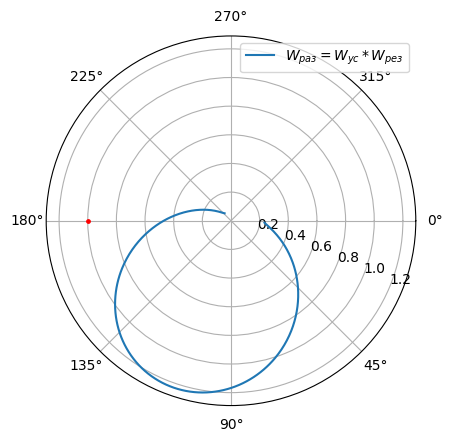

In [77]:
fi_s =  []
A_s = []
Re_s = []
Im_s = []

for i in range(len(fi_rez)):
    fi_s.append(fi_rez[i]+fi_st[i])
    A_s.append(A_rez[i]*A_st[i])


Re_s, Im_s = calc_coords(fi_s, A_s)

ax= plt.subplot(111, projection='polar')
ax.set_theta_direction(-1)
ax.plot(fi_s, A_s, label='$W_{раз}=W_{ус}*W_{рез}$')
ax.scatter(math.pi, 1, color="red", zorder=2, s=6)
ax.legend()
plt.rcParams['figure.dpi'] = 300
plt.show()


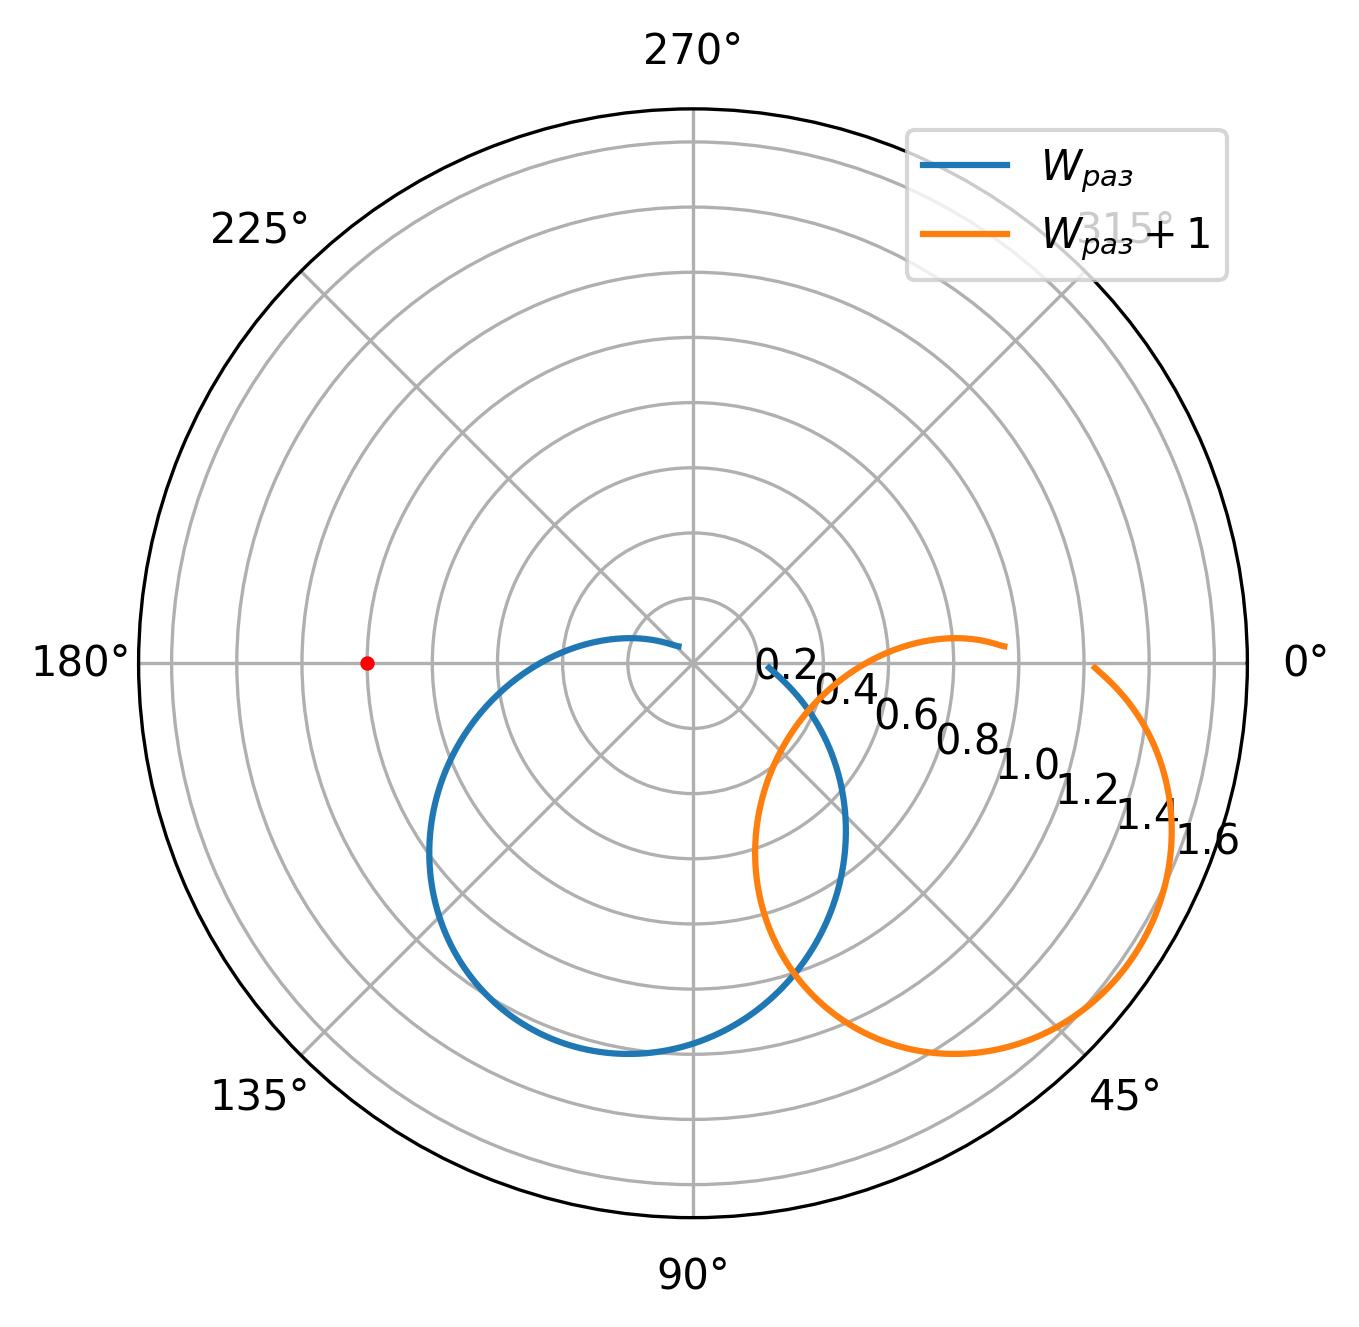

In [78]:
fi_zn =  []
A_zn = []
Re_zn = []
Im_zn = []

for i in range(len(Re_s)):
    Re_zn.append(Re_s[i]+1)
    Im_zn.append(-Im_s[i])

fi_zn, A_zn = calc_polar(Re_zn, Im_zn)

ax= plt.subplot(111, projection='polar')
ax.set_theta_direction(-1)
ax.plot(fi_s, A_s, label='$W_{раз}$')
ax.plot(fi_zn, A_zn, label='$W_{раз}+1$')
ax.scatter(math.pi, 1, color="red", zorder=2, s=6)
ax.legend()
plt.rcParams['figure.dpi'] = 300
plt.show()



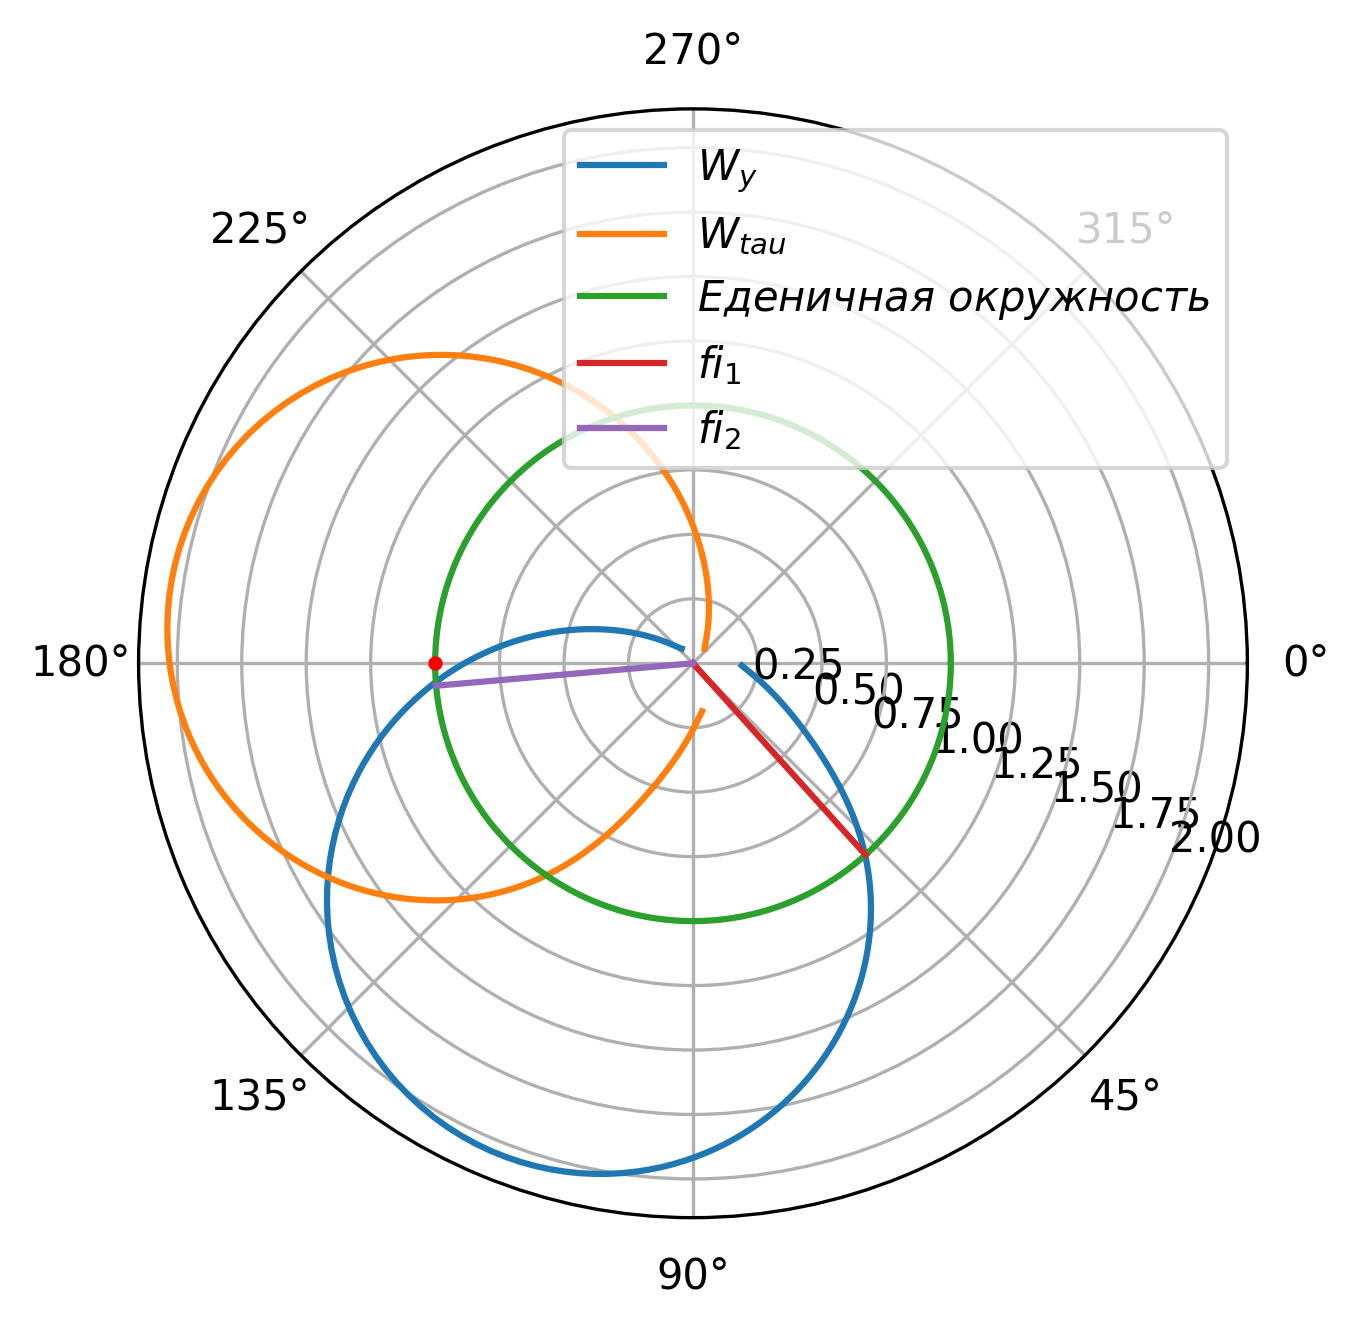

In [83]:
fi_y =  []
fi_y_ = []
A_y = []
Re_y = []
Im_y = []

fi_sirc=[]
A_sirc=[]

fi_1=[0, 48/180*math.pi]
fi_2=[0, 175/180*math.pi]
A = [0, 1]

f_1 = 180-48
f_2 = 180-175

tau = f_1-f_2
 

for i in range(len(fi_s)):
    fi_y.append(fi_s[i]-fi_zn[i])
    A_y.append(A_s[i]/A_zn[i])

for i in range(0, 628, 1):
    fi_sirc.append(i/100)
    A_sirc.append(1)

for i in range(len(fi_y)):
    fi_y_.append(fi_y[i]+tau)

ax= plt.subplot(111, projection='polar')
ax.set_theta_direction(-1)
ax.plot(fi_y, A_y, label='$W_y$')
ax.plot(fi_y_, A_y, label='$W_{tau}$')
ax.plot(fi_sirc, A_sirc, label='$Еденичная$ $окружность$')
ax.plot(fi_1, A, label='$fi_1$')
ax.plot(fi_2, A, label='$fi_2$')
ax.scatter(math.pi, 1, color="red", zorder=2, s=6)
ax.legend()
plt.rcParams['figure.dpi'] = 300
plt.show()

In [ ]:


ax= plt.subplot(111, projection='polar')
ax.set_theta_direction(-1)
ax.plot(fi_y, A_y, label='$W_y$')
ax.plot(fi_s, A_s, label='$W_{раз}$')
ax.scatter(math.pi, 1, color="red", zorder=2, s=6)
ax.legend()
plt.rcParams['figure.dpi'] = 300
plt.show()